<a href="https://www.kaggle.com/code/kaoutharhamdan/detecting-gender-bias-in-income-prediction?scriptVersionId=292399535" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Detecting Gender Bias in Income Prediction**

let`s make a situation:

*context:*

A government researcher  wants to analyze the potential gender bias in income predictions.
The dataset contains:

1. sex: Male / Female (sensitive attribute)
2. income: >50K / <=50K (binary target variable)
3. Other features: age, education, marital_status, occupation, hours_per_week, etc.

*Overall objective*: Build an ML model to predict whether someone earns >50K and check whether the model is fair with respect to gender.


In [1]:
import pandas as pd 
import numpy as np
import  matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("/kaggle/input/adult-census-income/adult.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df["income"].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [7]:
df.isna().any()

age               False
workclass         False
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation        False
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country    False
income            False
dtype: bool

# Statistical analysis of raw data :

**The question:**

Is the income rate different between men and women in historical data?



In [8]:
# rate of woman vs men
gender_counts = df['sex'].value_counts().sort_index()
gender_counts

sex
Female    10771
Male      21790
Name: count, dtype: int64

In [9]:
total = len(df)
male_prop = gender_counts.Male / total
female_prop = gender_counts.Female / total


In [10]:
print(f"\nProportion of males: {male_prop:.2%}")
print(f"Proportion of females: {female_prop:.2%}")


Proportion of males: 66.92%
Proportion of females: 33.08%


In [11]:
print(f"\nProportion of males: {male_prop:.2%}")
print(f"Proportion of females: {female_prop:.2%}")


Proportion of males: 66.92%
Proportion of females: 33.08%


/tmp/ipykernel_17/1497730255.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bars = plt.bar(['Male', 'Female'], [gender_counts.get(1, 0), gender_counts.get(2, 0)])


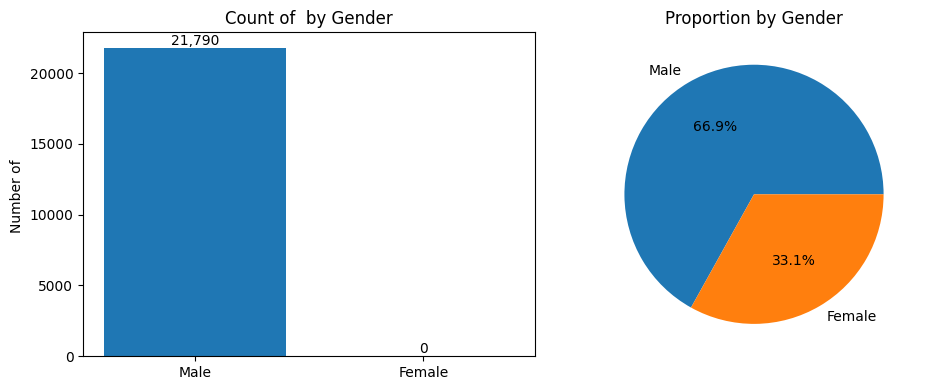

In [12]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
bars = plt.bar(['Male', 'Female'], [gender_counts.get(1, 0), gender_counts.get(2, 0)])
plt.title('Count of  by Gender')
plt.ylabel('Number of ')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}', ha='center', va='bottom')

plt.subplot(1, 2, 2)
plt.pie([male_prop, female_prop], labels=['Male', 'Female'], autopct='%1.1f%%')
plt.title('Proportion by Gender')

plt.tight_layout()
plt.show()

In [13]:
df["income"] = df["income"].apply(lambda x: 1 if x == ">50K" else 0)

In [14]:
high_income_by_gender = df.groupby('sex')['income'].mean().sort_index()

low_income_by_gender = 1-high_income_by_gender
print(f"\n earning Rates (proportion earning >50K):")
print(f"Male (1): {high_income_by_gender.Male:.2%}")
print(f"Female (2): {high_income_by_gender.Female:.2%}")

print(f"\n earning Rates (proportion earning <=50K):")
print(f"Male (1): {low_income_by_gender.Male:.2%}")
print(f"Female (2): {low_income_by_gender.Female:.2%}")


 earning Rates (proportion earning >50K):
Male (1): 30.57%
Female (2): 10.95%

 earning Rates (proportion earning <=50K):
Male (1): 69.43%
Female (2): 89.05%


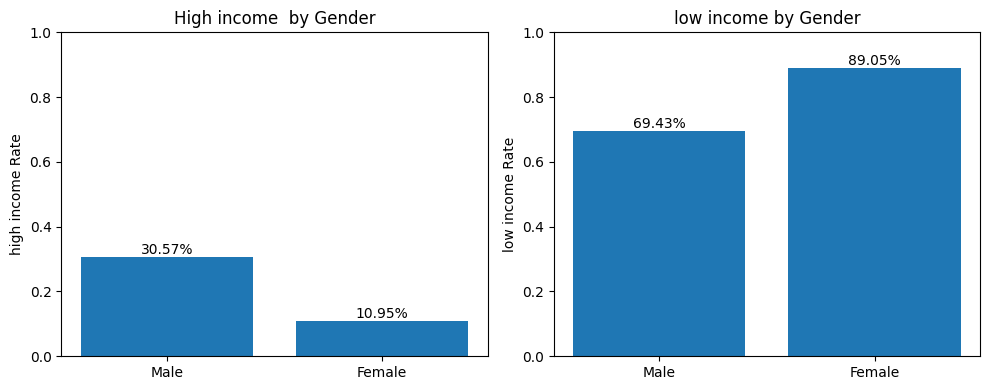

In [15]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
bars = plt.bar(['Male', 'Female'], [high_income_by_gender.Male, high_income_by_gender.Female])
plt.title('High income  by Gender')
plt.ylabel('high income Rate')
plt.ylim(0, 1)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2%}', ha='center', va='bottom')

plt.subplot(1, 2, 2)
bars = plt.bar(['Male', 'Female'], [low_income_by_gender.Male, low_income_by_gender.Female])
plt.title('low income by Gender')
plt.ylabel('low income Rate')
plt.ylim(0, 1)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [16]:
delta=high_income_by_gender.Male -high_income_by_gender.Female
delta

np.float64(0.19627598779361352)

In [17]:
print("\nAge Statistics by Gender:")
age_stats = df.groupby('sex')['age'].agg(['mean', 'median', 'std', 'min', 'max'])
print(age_stats)


Age Statistics by Gender:
             mean  median        std  min  max
sex                                           
Female  36.858230    35.0  14.013697   17   90
Male    39.433547    38.0  13.370630   17   90


In [18]:
# Marital status distribution
print("\nMarital Status Distribution by Gender:")

marital_cross = pd.crosstab(df['sex'], df['marital.status'], normalize='index')
print(marital_cross)


Marital Status Distribution by Gender:
marital.status  Divorced  Married-AF-spouse  Married-civ-spouse  \
sex                                                               
Female          0.248074           0.001300            0.153839   
Male            0.081276           0.000413            0.611244   

marital.status  Married-spouse-absent  Never-married  Separated   Widowed  
sex                                                                        
Female                       0.019033       0.442577   0.058583  0.076595  
Male                         0.009775       0.271501   0.018082  0.007710  


In [19]:
from scipy import stats
# Create binary approval variable (1 = approved, 0 = denied/defaulted)
df['approved'] = (df['income'] == 0).astype(int)


male_approved = df[df['sex'] == "Male"]['approved']
female_approved = df[df['sex'] == "Female"]['approved']

# Perform chi-square test for independence
contingency_table = pd.crosstab(df['sex'], df['approved'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"\nChi-square test for independence:")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.10f}")

if p_value < 0.05:
    print(f"✓ Statistically significant difference in approval rates (p < 0.05)")
else:
    print(f"✗ No statistically significant difference in approval rates (p ≥ 0.05)")



Chi-square test for independence:
Chi-square statistic: 1517.8134
P-value: 0.0000000000
✓ Statistically significant difference in approval rates (p < 0.05)


In [20]:
# Perform two-proportion z-test
from statsmodels.stats.proportion import proportions_ztest

# Get counts
male_total = len(male_approved)
male_success = male_approved.sum()
female_total = len(female_approved)
female_success = female_approved.sum()

# Perform z-test
count = np.array([male_success, female_success])
nobs = np.array([male_total, female_total])
z_stat, p_val = proportions_ztest(count, nobs)

print(f"\nTwo-proportion z-test:")
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_val:.6f}")
if p_value < 0.05:
    print(f"✓ Statistically significant difference in approval rates (p < 0.05)")
else:
    print(f"✗ No statistically significant difference in approval rates (p ≥ 0.05)")



Two-proportion z-test:
Z-statistic: -38.9729
P-value: 0.000000
✓ Statistically significant difference in approval rates (p < 0.05)


# ML modeling


## Data Preproccesing : 

In [21]:
X = df.drop(columns=['income']+["approved"])
y = df['income']

In [22]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country'],
      dtype='object')

In [23]:
cat_features = X.select_dtypes(include='object').columns.tolist()



In [24]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y ,test_size=0.2, train_size=0.8,random_state=42, stratify=y)

In [25]:
train_df = X_train.copy()
train_df['income'] = y_train

test_df = X_valid.copy()
test_df['income'] = y_valid

In [26]:
import pandas as pd

def compute_distribution(df):
    # Distribution de genre
    male_rate = (df['sex'] == 'Male').mean() * 100
    female_rate = (df['sex'] == 'Female').mean() * 100
    
    # Taux Income > 50K
    income_rate = (df['income'] == 1).mean() * 100
    
    return male_rate, female_rate, income_rate

# Calcul des distributions
male_train, female_train, income_train = compute_distribution(train_df)
male_test, female_test, income_test = compute_distribution(test_df)

# Calcul des différences
diff_male = male_train - male_test
diff_female = female_train - female_test
diff_income = income_train - income_test

# Construire le tableau
table = pd.DataFrame({
    "Ensemble": ["Train", "Test", "Différence"],
    "% Male": [male_train, male_test, diff_male],
    "% Female": [female_train, female_test, diff_female],
    "% Income>50K": [income_train, income_test, diff_income]
})

print(table)


     Ensemble     % Male   % Female  % Income>50K
0       Train  66.914926  33.085074     24.082463
1        Test  66.943037  33.056963     24.074927
2  Différence  -0.028111   0.028111      0.007536


## Catboost

In [27]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    eval_metric='Accuracy',
    random_seed=42,
    verbose=50
)


In [28]:
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_valid, y_valid),
    early_stopping_rounds=50
)


0:	learn: 0.8455160	test: 0.8410871	best: 0.8410871 (0)	total: 97.7ms	remaining: 48.8s
50:	learn: 0.8694334	test: 0.8608936	best: 0.8608936 (49)	total: 1.65s	remaining: 14.5s
100:	learn: 0.8771883	test: 0.8685706	best: 0.8688776 (96)	total: 3.2s	remaining: 12.6s
150:	learn: 0.8827933	test: 0.8711807	best: 0.8711807 (148)	total: 4.79s	remaining: 11.1s
200:	learn: 0.8858262	test: 0.8724090	best: 0.8725626 (191)	total: 6.31s	remaining: 9.39s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8725625672
bestIteration = 191

Shrink model to first 192 iterations.


In [29]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_valid)

print(classification_report(y_valid, y_pred))
print(confusion_matrix(y_valid, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4945
           1       0.78      0.66      0.71      1568

    accuracy                           0.87      6513
   macro avg       0.84      0.80      0.82      6513
weighted avg       0.87      0.87      0.87      6513

[[4648  297]
 [ 533 1035]]


## Subgroup Analysis 

In [30]:
male_mask = X_valid['sex'] == 'Male'
female_mask = X_valid['sex'] == 'Female'

In [31]:
male_data = X_valid[male_mask]
female_data = X_valid[female_mask]

In [32]:
male_data = male_data.copy()
male_data['y_pred'] = y_pred[male_mask]
male_data['y_true'] = y_valid[male_mask]

female_data = female_data.copy()
female_data['y_pred'] = y_pred[female_mask]
female_data['y_true'] = y_valid[female_mask]

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Calculer les métriques pour chaque groupe
def calculate_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, pos_label=1)
    rec = recall_score(y_true, y_pred, pos_label=1)
    f1 = f1_score(y_true, y_pred, pos_label=1)
    
    # Calculer TPR et FPR
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    tpr = tp / (tp + fn)  # Recall = TPR
    fpr = fp / (fp + tn)
    
    return {
        'Accuracy': acc,
        'Precision (classe 1)': prec,
        'Recall (classe 1)': rec,
        'F1-score (classe 1)': f1,
        'TPR': tpr,
        'FPR': fpr
    }

# Métriques pour chaque groupe
male_metrics = calculate_metrics(male_data['y_true'], male_data['y_pred'])
female_metrics = calculate_metrics(female_data['y_true'], female_data['y_pred'])

# Créer le tableau comparatif
results = []
for metric_name in male_metrics.keys():
    male_val = male_metrics[metric_name]
    female_val = female_metrics[metric_name]
    gap = male_val - female_val
    
    # Formater selon le type de métrique
    if metric_name == 'Accuracy' or metric_name == 'TPR':
        male_str = f"{male_val*100:.1f}%"
        female_str = f"{female_val*100:.1f}%"
        gap_str = f"{gap*100:.1f} pp"
    elif metric_name == 'FPR':
        male_str = f"{male_val*100:.1f}%"
        female_str = f"{female_val*100:.1f}%"
        gap_str = f"{gap*100:.1f} pp"
    else:
        male_str = f"{male_val:.2f}"
        female_str = f"{female_val:.2f}"
        gap_str = f"{gap:.2f}"
    
    results.append({
        'Métrique': metric_name,
        'Male': male_str,
        'Female': female_str,
        'Écart': gap_str
    })

# Afficher le tableau
df_results = pd.DataFrame(results)
print(df_results.to_string(index=False))

            Métrique  Male Female    Écart
            Accuracy 83.9%  94.1% -10.3 pp
Precision (classe 1)  0.77   0.83    -0.06
   Recall (classe 1)  0.67   0.59     0.08
 F1-score (classe 1)  0.72   0.69     0.03
                 TPR 67.2%  59.2%   8.0 pp
                 FPR  8.8%   1.5%   7.3 pp


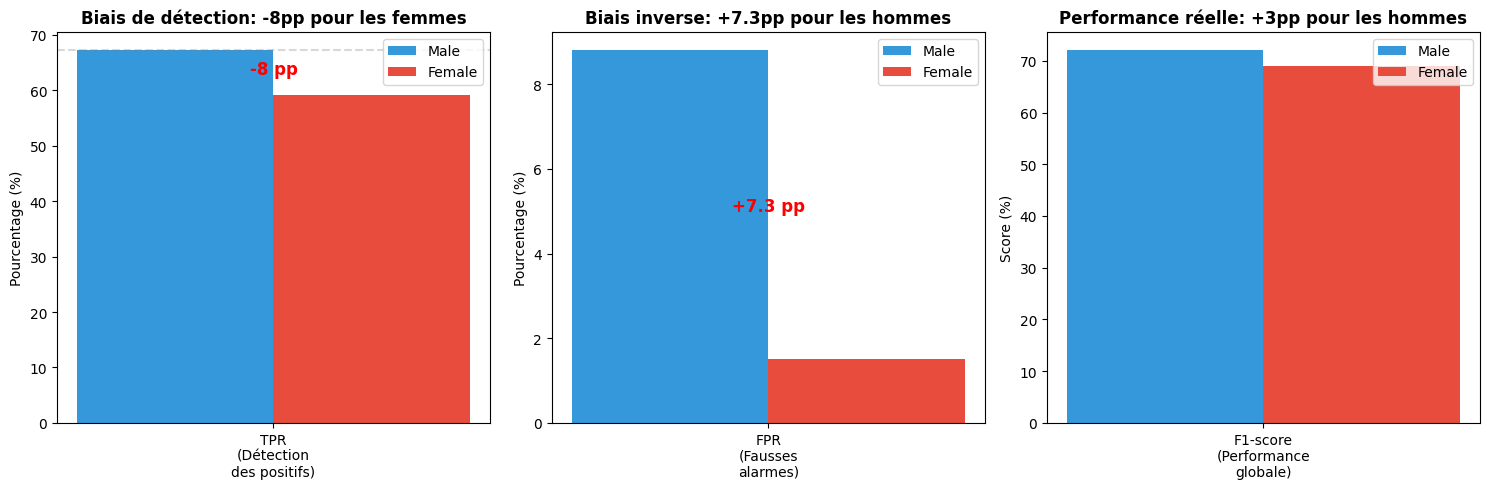

In [34]:
# Visualisation du biais
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1. Comparaison TPR (capacité à détecter les positifs)
metrics_1 = ['TPR\n(Détection\ndes positifs)']
male_vals_1 = [67.2]
female_vals_1 = [59.2]

x = np.arange(len(metrics_1))
width = 0.35

axes[0].bar(x - width/2, male_vals_1, width, label='Male', color='#3498db')
axes[0].bar(x + width/2, female_vals_1, width, label='Female', color='#e74c3c')
axes[0].set_ylabel('Pourcentage (%)')
axes[0].set_title('Biais de détection: -8pp pour les femmes', fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics_1)
axes[0].legend()
axes[0].axhline(y=67.2, color='gray', linestyle='--', alpha=0.3)
axes[0].text(0, 63, '-8 pp', ha='center', fontsize=12, color='red', fontweight='bold')

# 2. Comparaison FPR (taux de fausses alarmes)
metrics_2 = ['FPR\n(Fausses\nalarmes)']
male_vals_2 = [8.8]
female_vals_2 = [1.5]

axes[1].bar(x - width/2, male_vals_2, width, label='Male', color='#3498db')
axes[1].bar(x + width/2, female_vals_2, width, label='Female', color='#e74c3c')
axes[1].set_ylabel('Pourcentage (%)')
axes[1].set_title('Biais inverse: +7.3pp pour les hommes', fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(metrics_2)
axes[1].legend()
axes[1].text(0, 5, '+7.3 pp', ha='center', fontsize=12, color='red', fontweight='bold')

# 3. F1-score (performance équilibrée)
metrics_3 = ['F1-score\n(Performance\nglobale)']
male_vals_3 = [0.72 * 100]
female_vals_3 = [0.69 * 100]

axes[2].bar(x - width/2, male_vals_3, width, label='Male', color='#3498db')
axes[2].bar(x + width/2, female_vals_3, width, label='Female', color='#e74c3c')
axes[2].set_ylabel('Score (%)')
axes[2].set_title('Performance réelle: +3pp pour les hommes', fontweight='bold')
axes[2].set_xticks(x)
axes[2].set_xticklabels(metrics_3)
axes[2].legend()

plt.tight_layout()
plt.savefig('biais_modele.png', dpi=300, bbox_inches='tight')
plt.show()

In [35]:
p_male = male_data['y_pred'].mean()
p_female = female_data['y_pred'].mean()
delta_ml = p_male - p_female

print("P(Ŷ=1 | Male):", p_male)
print("P(Ŷ=1 | Female):", p_female)
print("Difference (Δ):", delta_ml)

P(Ŷ=1 | Male): 0.2665137614678899
P(Ŷ=1 | Female): 0.07895959126799815
Difference (Δ): 0.18755417019989176


# **Statistical analysis of ML predictions**

## Fairness Metrics Guide

**Fairness Metrics**

 1. **Demographic Parity (Independence)**
***Definition***: The model should predict the positive class at the same rate for all groups, regardless of their demographic membership.

***Formula***: `P(Ŷ=1 | Male) ≈ P(Ŷ=1 | Female)`

***Interpretation***:
- **Statistical Parity Difference**: Difference between positive prediction rates. Ideally = 0.
- **Disparate Impact Ratio**: Ratio between rates (disadvantaged group / advantaged group). 
  - Acceptable value: > 0.8 (80% rule - EEOC)

***Example***: If the model predicts "credit approved" for 30% of men, it should also predict "credit approved" for approximately 30% of women.


 2. **Equalized Odds (Separation)**
***Definition***: The model should have the same true positive rate (TPR) AND false positive rate (FPR) for all groups, conditional on the true class.

***Formulas***:
- `P(Ŷ=1 | Y=1, Male) ≈ P(Ŷ=1 | Y=1, Female)` (TPR)
- `P(Ŷ=1 | Y=0, Male) ≈ P(Ŷ=1 | Y=0, Female)` (FPR)

***Interpretation***:
- **TPR Difference**: Gap in the ability to detect true positives.
- **FPR Difference**: Gap in the false alarm rate.
- **Equalized Odds**: Maximum of the two gaps. Ideally < 0.1.

**Example**: Among people who deserve credit (Y=1), the model should grant it at the same rate for men and women.

---
 3. **Equal Opportunity**
**Definition**: Simplified version of Equalized Odds that focuses only on true positives (TPR). The model should have the same detection rate for positive cases across all groups.

**Formula**: `P(Ŷ=1 | Y=1, Male) ≈ P(Ŷ=1 | Y=1, Female)`

**Interpretation**:
- Measures whether qualified individuals have the same chances of being identified, regardless of their group.
-  Acceptable: |difference| < 0.1
-  Problematic: |difference| > 0.1

**Example**: Among competent job candidates, all should have the same probability of being selected by the model.

---

### 4. **Predictive Parity (Sufficiency)**
**Definition**: Among people for whom the model predicts the positive class, the proportion of true positives should be the same for all groups.

**Formula**: `P(Y=1 | Ŷ=1, Male) ≈ P(Y=1 | Ŷ=1, Female)`

**Interpretation**:
- **PPV (Positive Predictive Value)**: Model precision = when it predicts "yes", is it correct?
- Ensures that the "reliability" of positive predictions is the same for all groups.

**Example**: If the model says "this person will repay their loan", this prediction should be equally reliable for men and women.

---

### 5. **Base Rates**
**Definition**: Actual proportion of the positive class in each group. This is not a fairness metric, but it's crucial for interpretation.

**Formula**: `P(Y=1 | Male)` and `P(Y=1 | Female)`

**Interpretation**:
- If base rates are different, certain fairness criteria become impossible to satisfy simultaneously.
- Helps understand whether observed differences reflect real differences in the data.

**Example**: If 20% of men and 15% of women actually repay their loans in historical data, this difference contextualizes the model's performance.

---

**Statistical Tests**

 1. **Z-Test (Proportions Test)**
**Objective**: Test whether the difference between two proportions is statistically significant.

**Hypotheses**:
- H₀ (null): Proportions are equal (`p_male = p_female`)
- H₁ (alternative): Proportions are different (`p_male ≠ p_female`)

**Interpretation**:
- **Z-statistic**: Measures the size of the difference in standard deviation units.
  - |Z| > 1.96 → significant difference at 5% threshold
- **p-value**: Probability of observing this difference if H₀ is true.
  - p < 0.05 → Statistically significant difference ✗
  - p ≥ 0.05 → No evidence of difference ✓

**Example**: Z = 17.65, p < 0.001 → There is a HIGHLY significant difference between prediction rates for men and women.

---

 2. **Chi-Square Test (Independence Test)**
**Objective**: Test whether two categorical variables (sex and prediction) are independent.

**Hypotheses**:
- H₀ (null): Variables are independent (sex does not influence prediction)
- H₁ (alternative): Variables are dependent (sex influences prediction)

**Interpretation**:
- **Chi² statistic**: Measures the deviation between observed and expected frequencies.
- **p-value**: 
  - p < 0.05 → Significant dependence ✗
  - p ≥ 0.05 → Independent variables ✓
- **Cramér's V**: Effect size (strength of association)
  - V < 0.1: Negligible
  - 0.1 ≤ V < 0.3: Small
  - 0.3 ≤ V < 0.5: Medium
  - V ≥ 0.5: Large

**Example**: χ² = 312.45, p < 0.001, V = 0.25 → There is a SIGNIFICANT and MEDIUM association between sex and prediction.

---

 3. **Bootstrap (Confidence Interval)**
**Objective**: Estimate the uncertainty around the observed difference by simulating many samples.

**Method**:
1. Draw 1000 random samples with replacement
2. Calculate the difference for each sample
3. Obtain the 95% confidence interval

**Interpretation**:
- **Bootstrap mean Δ**: Robust estimate of the true difference.
- **95% CI**: "We are 95% confident that the true difference lies within this interval"
  - If CI does not contain 0 → Significant difference ✗
  - If CI contains 0 → No evidence of difference ✓

**Example**: Δ = 0.188, CI = [0.171, 0.204] → The true difference is probably between 17.1% and 20.4%. Since 0 is not in the interval, the difference is significant.

---

 Which Metric to Choose?

| **Context** | **Recommended Metric** | **Why?** |
|-------------|------------------------|----------|
| **High-stakes decisions** (credit, employment, justice) | Equalized Odds or Equal Opportunity | Ensures opportunities are fair for qualified individuals |
| **Initial screening** (pre-selection) | Demographic Parity | Ensures all groups have equal access to the process |
| **Prediction reliability** (medical diagnosis) | Predictive Parity | Guarantees predictions are equally reliable for everyone |
| **Legal compliance** (USA) | Disparate Impact (80% rule) | EEOC standard for detecting discrimination |

---

 Limitations and Incompatibilities

 **Impossibility Theorem**
It is mathematically impossible to simultaneously satisfy:
- Demographic Parity
- Equalized Odds
- Predictive Parity

...unless base rates are identical across groups.

**Trade-offs to Consider**:
- Optimizing for Demographic Parity may reduce overall performance
- Optimizing for Predictive Parity may create disparities in opportunities
- The choice depends on the ethical and legal context of your application

---

  References

- **Disparate Impact**: [EEOC Guidelines (1978)](https://www.eeoc.gov/laws/guidance/questions-and-answers-clarify-and-provide-common-interpretation-uniform-guidelines)
- **Fairness Definitions**: Verma & Rubin (2018) - "Fairness Definitions Explained"
- **Impossibility Results**: Kleinberg et al. (2017) - "Inherent Trade-Offs in the Fair Determination of Risk Scores"

---

 Quick Reference Table

| **Metric** | **What it measures** | **Acceptable threshold** |
|-----------|---------------------|------------------------|
| Statistical Parity Difference | Difference in positive prediction rates | ≈ 0 |
| Disparate Impact | Ratio of prediction rates | > 0.8 |
| TPR Difference | Gap in detecting true positives | < 0.1 |
| FPR Difference | Gap in false alarm rates | < 0.1 |
| Equalized Odds | Max(TPR diff, FPR diff) | < 0.1 |
| Equal Opportunity | TPR difference only | < 0.1 |
| Predictive Parity Diff | Precision difference | ≈ 0 |

---



## Fairness Metrics

In [36]:
import numpy as np
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest

def comprehensive_fairness_metrics(male_data, female_data):
    """
    Calcule un ensemble complet de métriques de fairness
    """
    results = {}
    
    # --- 1. DEMOGRAPHIC PARITY (Independence) ---
    p_male = male_data['y_pred'].mean()
    p_female = female_data['y_pred'].mean()
    
    results['p_male'] = p_male
    results['p_female'] = p_female
    results['statistical_parity_diff'] = p_male - p_female
    results['disparate_impact'] = p_female / p_male if p_male > 0 else np.nan
    
    # --- 2. EQUALIZED ODDS (Separation) ---
    # TPR (True Positive Rate)
    tpr_male = male_data[male_data['y_true'] == 1]['y_pred'].mean()
    tpr_female = female_data[female_data['y_true'] == 1]['y_pred'].mean()
    results['tpr_male'] = tpr_male
    results['tpr_female'] = tpr_female
    results['tpr_diff'] = tpr_male - tpr_female
    
    # FPR (False Positive Rate)
    fpr_male = male_data[male_data['y_true'] == 0]['y_pred'].mean()
    fpr_female = female_data[female_data['y_true'] == 0]['y_pred'].mean()
    results['fpr_male'] = fpr_male
    results['fpr_female'] = fpr_female
    results['fpr_diff'] = fpr_male - fpr_female
    
    # Equalized Odds 
    results['equalized_odds'] = max(abs(results['tpr_diff']), abs(results['fpr_diff']))
    
    # 3. EQUAL OPPORTUNITY 
    results['equal_opportunity_diff'] = results['tpr_diff']
    
    # 4. PREDICTIVE PARITY 
    # PPV (Positive Predictive Value) = Precision
    ppv_male = male_data[male_data['y_pred'] == 1]['y_true'].mean() if male_data['y_pred'].sum() > 0 else np.nan
    ppv_female = female_data[female_data['y_pred'] == 1]['y_true'].mean() if female_data['y_pred'].sum() > 0 else np.nan
    results['ppv_male'] = ppv_male
    results['ppv_female'] = ppv_female
    results['predictive_parity_diff'] = ppv_male - ppv_female
    
    # NPV (Negative Predictive Value)
    npv_male = male_data[male_data['y_pred'] == 0]['y_true'].mean() if (male_data['y_pred'] == 0).sum() > 0 else np.nan
    npv_female = female_data[female_data['y_pred'] == 0]['y_true'].mean() if (female_data['y_pred'] == 0).sum() > 0 else np.nan
    results['npv_male'] = 1 - npv_male if not np.isnan(npv_male) else np.nan
    results['npv_female'] = 1 - npv_female if not np.isnan(npv_female) else np.nan
    
    #  5. CALIBRATION 
    results['base_rate_male'] = male_data['y_true'].mean()
    results['base_rate_female'] = female_data['y_true'].mean()
    results['base_rate_diff'] = results['base_rate_male'] - results['base_rate_female']
    
    return results


fairness_metrics = comprehensive_fairness_metrics(male_data, female_data)



In [37]:
#resmue of all fairmetrics

print("ANALYSE COMPLÈTE DE FAIRNESS")


print("\n 1. DEMOGRAPHIC PARITY (Independence)")
print(f"P(Ŷ=1 | Male):   {fairness_metrics['p_male']:.4f}")
print(f"P(Ŷ=1 | Female): {fairness_metrics['p_female']:.4f}")
print(f"Statistical Parity Difference: {fairness_metrics['statistical_parity_diff']:.4f}")
print(f"Disparate Impact Ratio: {fairness_metrics['disparate_impact']:.4f}")
print(f"  → {'✗ VIOLATION' if fairness_metrics['disparate_impact'] < 0.8 else '✓ Respecté'} (seuil: 0.8)")

print("\n 2. EQUALIZED ODDS (Separation) ")
print(f"TPR Male:   {fairness_metrics['tpr_male']:.4f}")
print(f"TPR Female: {fairness_metrics['tpr_female']:.4f}")
print(f"TPR Difference: {fairness_metrics['tpr_diff']:.4f}")
print(f"FPR Male:   {fairness_metrics['fpr_male']:.4f}")
print(f"FPR Female: {fairness_metrics['fpr_female']:.4f}")
print(f"FPR Difference: {fairness_metrics['fpr_diff']:.4f}")
print(f"Equalized Odds (max): {fairness_metrics['equalized_odds']:.4f}")
print(f"  → {'✗ VIOLATION' if fairness_metrics['equalized_odds'] > 0.1 else '✓ Respecté'} (seuil: 0.1)")

print("\n 3. EQUAL OPPORTUNITY ")
print(f"Equal Opportunity Difference: {fairness_metrics['equal_opportunity_diff']:.4f}")
print(f"  → {'✗ VIOLATION' if abs(fairness_metrics['equal_opportunity_diff']) > 0.1 else '✓ Respecté'} (seuil: 0.1)")

print("\n 4. PREDICTIVE PARITY (Sufficiency) ")
print(f"PPV (Precision) Male:   {fairness_metrics['ppv_male']:.4f}")
print(f"PPV (Precision) Female: {fairness_metrics['ppv_female']:.4f}")
print(f"Predictive Parity Difference: {fairness_metrics['predictive_parity_diff']:.4f}")

print("\n 5. BASE RATES")
print(f"Base Rate Male:   {fairness_metrics['base_rate_male']:.4f}")
print(f"Base Rate Female: {fairness_metrics['base_rate_female']:.4f}")
print(f"Base Rate Difference: {fairness_metrics['base_rate_diff']:.4f}")

ANALYSE COMPLÈTE DE FAIRNESS

 1. DEMOGRAPHIC PARITY (Independence)
P(Ŷ=1 | Male):   0.2665
P(Ŷ=1 | Female): 0.0790
Statistical Parity Difference: 0.1876
Disparate Impact Ratio: 0.2963
  → ✗ VIOLATION (seuil: 0.8)

 2. EQUALIZED ODDS (Separation) 
TPR Male:   0.6722
TPR Female: 0.5924
TPR Difference: 0.0797
FPR Male:   0.0884
FPR Female: 0.0151
FPR Difference: 0.0733
Equalized Odds (max): 0.0797
  → ✓ Respecté (seuil: 0.1)

 3. EQUAL OPPORTUNITY 
Equal Opportunity Difference: 0.0797
  → ✓ Respecté (seuil: 0.1)

 4. PREDICTIVE PARITY (Sufficiency) 
PPV (Precision) Male:   0.7694
PPV (Precision) Female: 0.8294
Predictive Parity Difference: -0.0600

 5. BASE RATES
Base Rate Male:   0.3050
Base Rate Female: 0.1105
Base Rate Difference: 0.1945


## Statistical inference

In [38]:
def statistical_tests(male_data, female_data, df_eval):


    print("TESTS STATISTIQUES")
  
    
    # --- Test Z de proportions ---
    print("\n 1. Test Z (proportions)")
    count = np.array([male_data['y_pred'].sum(), female_data['y_pred'].sum()])
    nobs = np.array([len(male_data), len(female_data)])
    z_stat, p_value = proportions_ztest(count, nobs)
    print(f"Z-statistic: {z_stat:.4f}")
    print(f"p-value: {p_value:.2e}")
    print(f"  → {'✗ Différence SIGNIFICATIVE' if p_value < 0.05 else '✓ Pas de différence significative'}")
    
    # --- Test du Chi² ---
    print("\n 2. Test du Chi² (indépendance)")
    contingency_table = pd.crosstab(df_eval['sex'], df_eval['y_pred'])
    print("\nTable de contingence:")
    print(contingency_table)
    
    chi2_stat, p_value_chi2, dof, expected = chi2_contingency(contingency_table)
    print(f"\nChi² statistic: {chi2_stat:.4f}")
    print(f"p-value: {p_value_chi2:.2e}")
    print(f"Degrees of freedom: {dof}")
    print(f"  → {'✗ Dépendance SIGNIFICATIVE' if p_value_chi2 < 0.05 else '✓ Variables indépendantes'}")
    
    # Cramér's V (taille d'effet)
    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2_stat / n)
    print(f"\nCramér's V (taille d'effet): {cramers_v:.4f}")
    if cramers_v < 0.1:
        effect = "Négligeable"
    elif cramers_v < 0.3:
        effect = "Faible"
    elif cramers_v < 0.5:
        effect = "Moyen"
    else:
        effect = "Fort"
    print(f"  → Taille d'effet: {effect}")
    
    # --- Bootstrap CI ---
    print("\n 3. Bootstrap (Intervalle de confiance)")
    def bootstrap_delta(df, n_bootstrap=1000):
        deltas = []
        for _ in range(n_bootstrap):
            sample = df.sample(frac=1, replace=True)
            p_m = sample[sample['sex'] == 'Male']['y_pred'].mean()
            p_f = sample[sample['sex'] == 'Female']['y_pred'].mean()
            deltas.append(p_m - p_f)
        return np.percentile(deltas, [2.5, 97.5]), np.mean(deltas)
    
    ci, mean_delta = bootstrap_delta(df_eval, n_bootstrap=1000)
    print(f"Bootstrap mean Δ: {mean_delta:.4f}")
    print(f"95% CI for Δ: [{ci[0]:.4f}, {ci[1]:.4f}]")
    print(f"  → {'✗ IC ne contient pas 0' if ci[0] > 0 or ci[1] < 0 else '✓ IC contient 0'}")
    
    return {
        'z_stat': z_stat,
        'z_pvalue': p_value,
        'chi2_stat': chi2_stat,
        'chi2_pvalue': p_value_chi2,
        'cramers_v': cramers_v,
        'bootstrap_ci': ci,
        'bootstrap_mean': mean_delta
    }

# Combiner les données
df_eval = pd.concat([male_data, female_data])

# Lancer tous les tests
test_results = statistical_tests(male_data, female_data, df_eval)

TESTS STATISTIQUES

 1. Test Z (proportions)
Z-statistic: 17.6532
p-value: 9.61e-70
  → ✗ Différence SIGNIFICATIVE

 2. Test du Chi² (indépendance)

Table de contingence:
y_pred     0     1
sex               
Female  1983   170
Male    3198  1162

Chi² statistic: 310.4839
p-value: 1.71e-69
Degrees of freedom: 1
  → ✗ Dépendance SIGNIFICATIVE

Cramér's V (taille d'effet): 0.2183
  → Taille d'effet: Faible

 3. Bootstrap (Intervalle de confiance)
Bootstrap mean Δ: 0.1872
95% CI for Δ: [0.1706, 0.2038]
  → ✗ IC ne contient pas 0


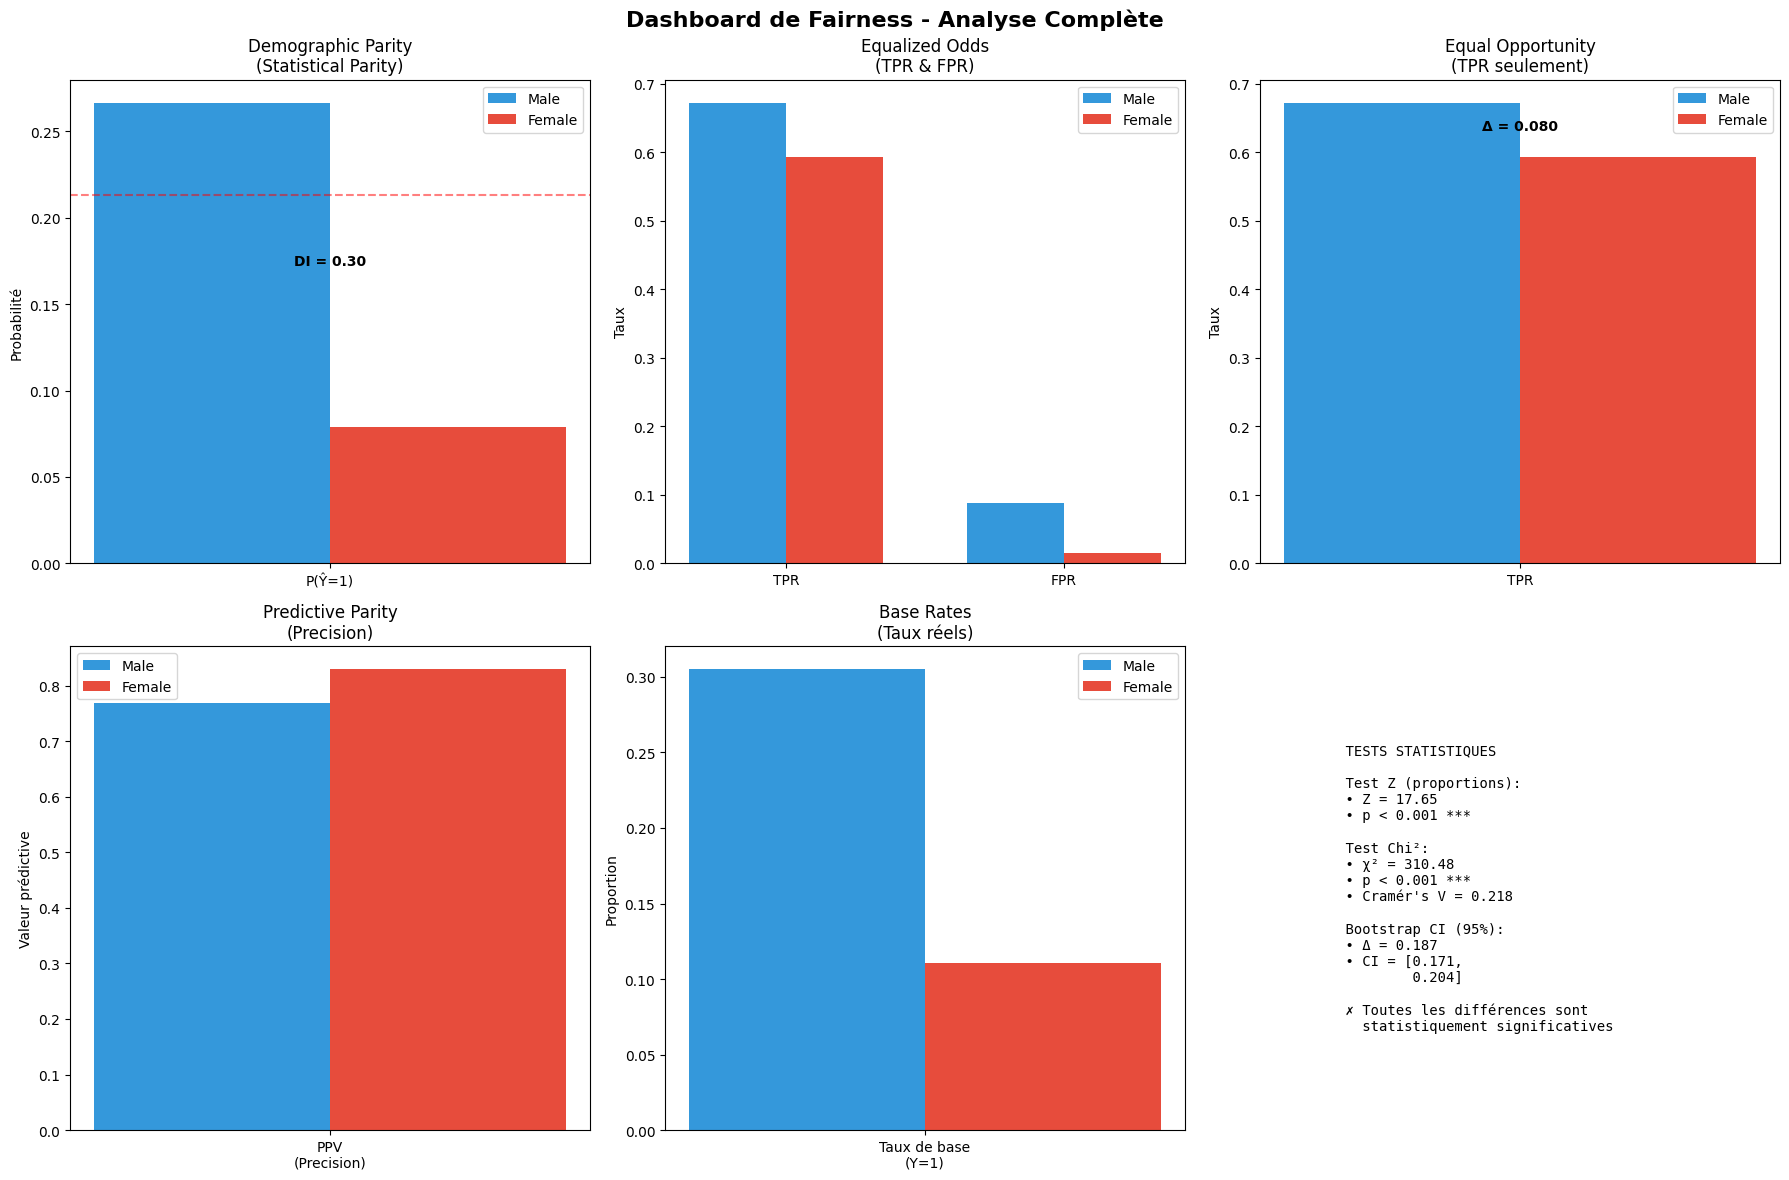

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_fairness_dashboard(fairness_metrics, test_results):
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Dashboard de Fairness - Analyse Complète', fontsize=16, fontweight='bold')
    
    # 1. Demographic Parity
    ax1 = axes[0, 0]
    metrics = ['P(Ŷ=1)']
    male_vals = [fairness_metrics['p_male']]
    female_vals = [fairness_metrics['p_female']]
    x = np.arange(len(metrics))
    width = 0.35
    ax1.bar(x - width/2, male_vals, width, label='Male', color='#3498db')
    ax1.bar(x + width/2, female_vals, width, label='Female', color='#e74c3c')
    ax1.set_ylabel('Probabilité')
    ax1.set_title('Demographic Parity\n(Statistical Parity)')
    ax1.set_xticks(x)
    ax1.set_xticklabels(metrics)
    ax1.legend()
    ax1.axhline(y=0.8*fairness_metrics['p_male'], color='red', linestyle='--', alpha=0.5, label='Seuil 80%')
    ax1.text(0, (male_vals[0] + female_vals[0])/2, 
             f'DI = {fairness_metrics["disparate_impact"]:.2f}', 
             ha='center', fontweight='bold', fontsize=10)
    
    # 2. Equalized Odds (TPR & FPR)
    ax2 = axes[0, 1]
    metrics = ['TPR', 'FPR']
    male_vals = [fairness_metrics['tpr_male'], fairness_metrics['fpr_male']]
    female_vals = [fairness_metrics['tpr_female'], fairness_metrics['fpr_female']]
    x = np.arange(len(metrics))
    ax2.bar(x - width/2, male_vals, width, label='Male', color='#3498db')
    ax2.bar(x + width/2, female_vals, width, label='Female', color='#e74c3c')
    ax2.set_ylabel('Taux')
    ax2.set_title('Equalized Odds\n(TPR & FPR)')
    ax2.set_xticks(x)
    ax2.set_xticklabels(metrics)
    ax2.legend()
    
    # 3. Equal Opportunity (TPR only)
    ax3 = axes[0, 2]
    metrics = ['TPR']
    male_vals = [fairness_metrics['tpr_male']]
    female_vals = [fairness_metrics['tpr_female']]
    x = np.arange(len(metrics))
    ax3.bar(x - width/2, male_vals, width, label='Male', color='#3498db')
    ax3.bar(x + width/2, female_vals, width, label='Female', color='#e74c3c')
    ax3.set_ylabel('Taux')
    ax3.set_title('Equal Opportunity\n(TPR seulement)')
    ax3.set_xticks(x)
    ax3.set_xticklabels(metrics)
    ax3.legend()
    ax3.text(0, (male_vals[0] + female_vals[0])/2, 
             f'Δ = {fairness_metrics["equal_opportunity_diff"]:.3f}', 
             ha='center', fontweight='bold', fontsize=10)
    
    # 4. Predictive Parity
    ax4 = axes[1, 0]
    metrics = ['PPV\n(Precision)']
    male_vals = [fairness_metrics['ppv_male']]
    female_vals = [fairness_metrics['ppv_female']]
    x = np.arange(len(metrics))
    ax4.bar(x - width/2, male_vals, width, label='Male', color='#3498db')
    ax4.bar(x + width/2, female_vals, width, label='Female', color='#e74c3c')
    ax4.set_ylabel('Valeur prédictive')
    ax4.set_title('Predictive Parity\n(Precision)')
    ax4.set_xticks(x)
    ax4.set_xticklabels(metrics)
    ax4.legend()
    
    # 5. Base Rates
    ax5 = axes[1, 1]
    metrics = ['Taux de base\n(Y=1)']
    male_vals = [fairness_metrics['base_rate_male']]
    female_vals = [fairness_metrics['base_rate_female']]
    x = np.arange(len(metrics))
    ax5.bar(x - width/2, male_vals, width, label='Male', color='#3498db')
    ax5.bar(x + width/2, female_vals, width, label='Female', color='#e74c3c')
    ax5.set_ylabel('Proportion')
    ax5.set_title('Base Rates\n(Taux réels)')
    ax5.set_xticks(x)
    ax5.set_xticklabels(metrics)
    ax5.legend()
    
    # 6. Tests statistiques (résumé)
    ax6 = axes[1, 2]
    ax6.axis('off')
    summary_text = f"""
    TESTS STATISTIQUES
    
    Test Z (proportions):
    • Z = {test_results['z_stat']:.2f}
    • p < 0.001 ***
    
    Test Chi²:
    • χ² = {test_results['chi2_stat']:.2f}
    • p < 0.001 ***
    • Cramér's V = {test_results['cramers_v']:.3f}
    
    Bootstrap CI (95%):
    • Δ = {test_results['bootstrap_mean']:.3f}
    • CI = [{test_results['bootstrap_ci'][0]:.3f}, 
            {test_results['bootstrap_ci'][1]:.3f}]
    
    ✗ Toutes les différences sont
      statistiquement significatives
    """
    ax6.text(0.1, 0.5, summary_text, fontsize=10, family='monospace',
             verticalalignment='center')
    
    plt.tight_layout()
    plt.savefig('fairness_dashboard.png', dpi=300, bbox_inches='tight')
    plt.show()

# Créer le dashboard
plot_fairness_dashboard(fairness_metrics, test_results)